In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from seaborn import barplot
import plotly.express as px
from google.colab import drive

Import Dataset

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Python Main Project/data.csv', encoding='utf-8')
print(data)

Mounted at /content/drive
              Income  Age  Dependents     Occupation City_Tier          Rent  \
0       44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1       26858.596592   34           2        Retired    Tier_2   5371.719318   
2       50367.605084   35           1        Student    Tier_3   7555.140763   
3      101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4       24875.283548   52           4   Professional    Tier_2   4975.056710   
...              ...  ...         ...            ...       ...           ...   
19995   40913.466178   51           4  Self_Employed    Tier_1  12274.039853   
19996   90295.772638   21           1        Student    Tier_2  18059.154528   
19997   40604.567373   30           1   Professional    Tier_2   8120.913475   
19998  118157.817240   27           2   Professional    Tier_1  35447.345172   
19999    8209.249769   62           3   Professional    Tier_1   2462.774931   

       Loan_R

Checking Data types

In [ ]:
print(data.dtypes)

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

The data types seems accurate with respect to the data given in the csv file. Hence no need for any conversions.

Checking for nulls in the dataset

In [ ]:
print(data.isnull().sum())

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

The dataset does not contain any nulls. However, it includes zero values that represent actual, non-missing data points.

Finding the lowest and highest age

In [ ]:
youngest_age = data['Age'].min()
oldest_age = data['Age'].max()
print("The youngest age is:", youngest_age)
print("The oldest age is:", oldest_age)

The youngest age is: 18
The oldest age is: 64


Finding Basic details of population per city tier, their occupations

Grouped Data:
   City_Tier     Occupation  Count
0     Tier_1   Professional   1489
1     Tier_1        Retired   1505
2     Tier_1  Self_Employed   1473
3     Tier_1        Student   1467
4     Tier_2   Professional   2499
5     Tier_2        Retired   2513
6     Tier_2  Self_Employed   2515
7     Tier_2        Student   2541
8     Tier_3   Professional   1023
9     Tier_3        Retired   1001
10    Tier_3  Self_Employed    979
11    Tier_3        Student    995

Total Population Data:
  City_Tier  Total_Population
0    Tier_1              5934
1    Tier_2             10068
2    Tier_3              3998


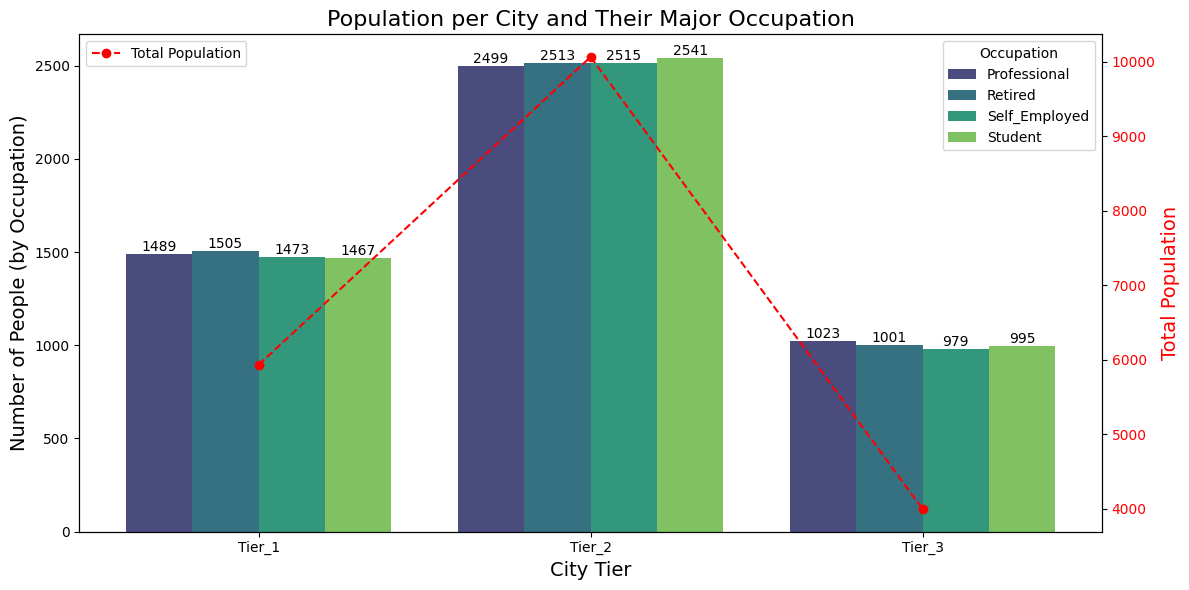

In [ ]:
grouped_data = data.groupby(['City_Tier', 'Occupation']).size().reset_index(name='Count')
total_population = data.groupby('City_Tier').size().reset_index(name='Total_Population')
data['City_Tier'] = data['City_Tier'].str.strip()
data = data.dropna(subset=['City_Tier'])
grouped_data = grouped_data.sort_values('City_Tier')
total_population = total_population.sort_values('City_Tier')
print("Grouped Data:")
print(grouped_data)
print("\nTotal Population Data:")
print(total_population)
total_population['Total_Population'] = total_population['Total_Population'].replace(0, np.nan)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x='City_Tier',
    y='Count',
    hue='Occupation',
    palette='viridis',
    ax=ax
)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black'
        )
ax2 = ax.twinx()
ax2.plot(
    total_population['City_Tier'],
    total_population['Total_Population'],
    color='red',
    marker='o',
    linestyle='--',
    label='Total Population'
)
ax2.set_ylabel('Total Population', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper left', fontsize=10)
ax.set_title('Population per City and Their Major Occupation', fontsize=16)
ax.set_xlabel('City Tier', fontsize=14)
ax.set_ylabel('Number of People (by Occupation)', fontsize=14)
ax.legend(title='Occupation', fontsize=10)
plt.tight_layout()
plt.show()

Overall Heatmap

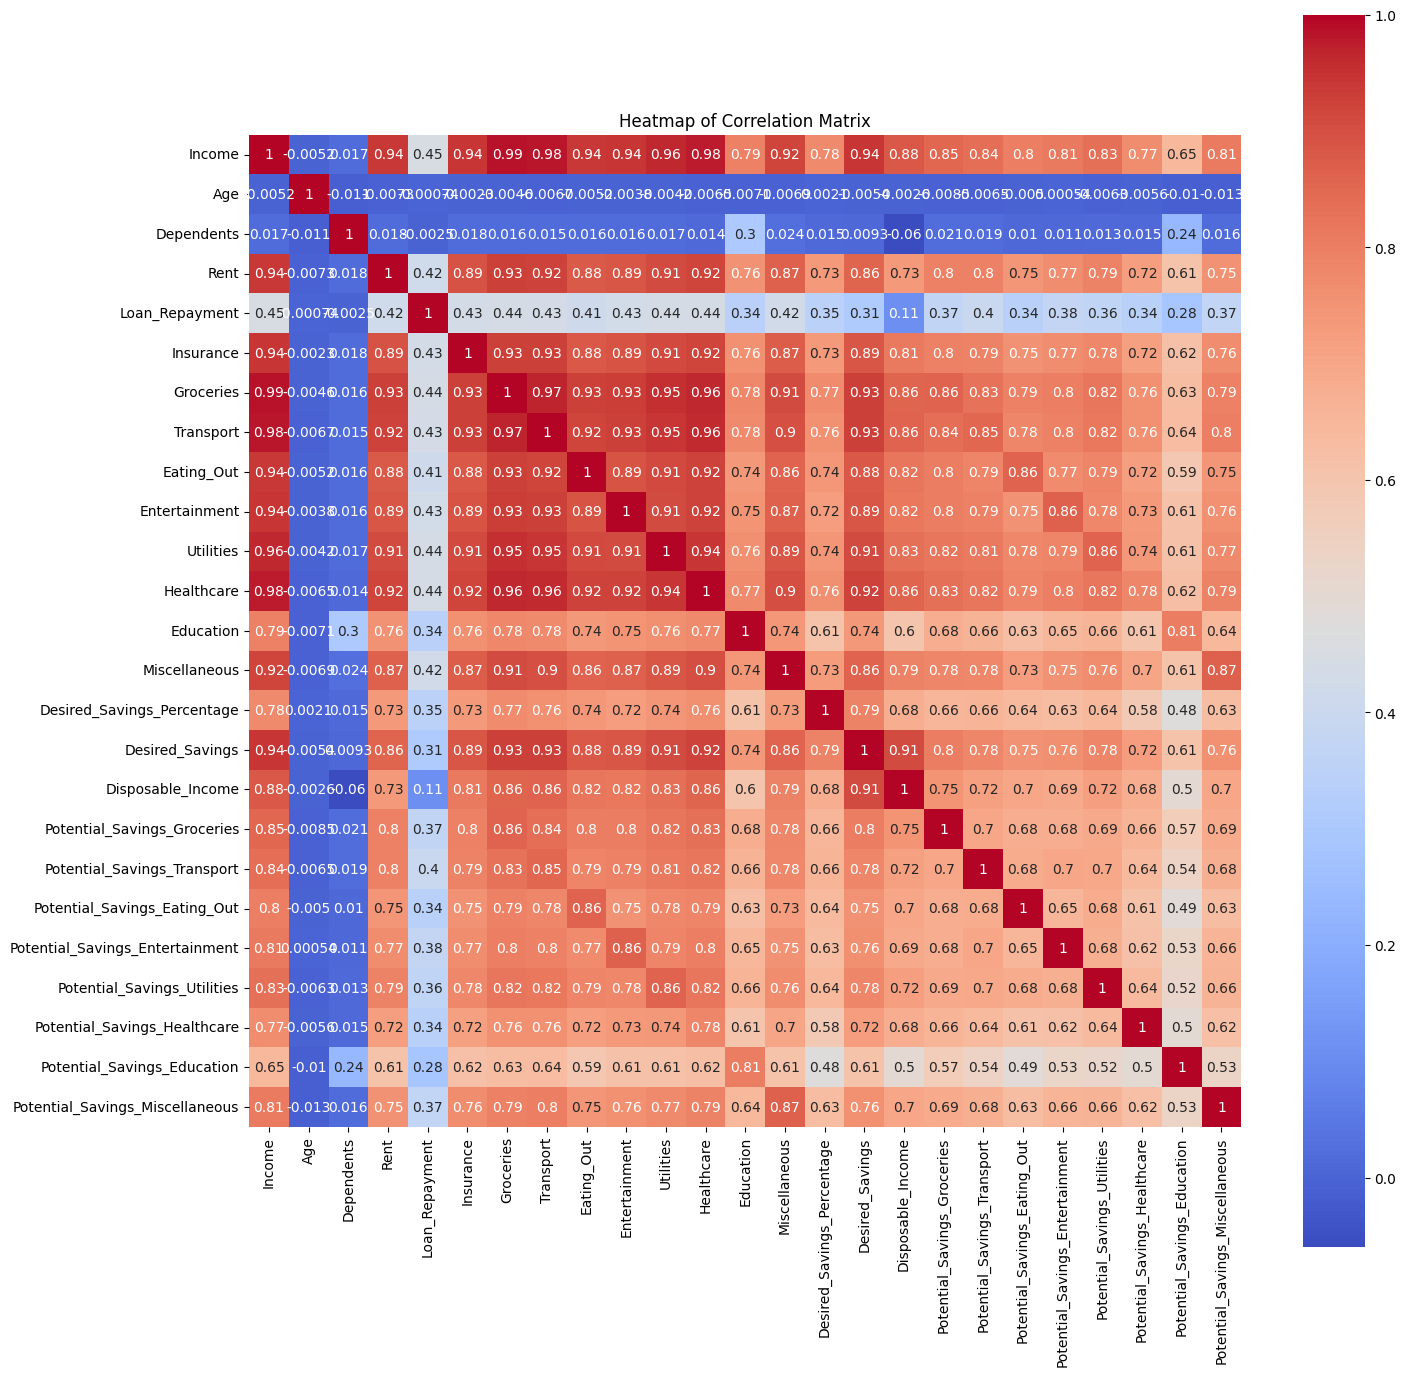

In [ ]:
data_no_Occupation = data.drop(columns=['Occupation', 'City_Tier'])
corr_matrix = data_no_Occupation.corr(method='pearson')
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

1. Age to Income Levels.
Let us see how income levels change based on the age.

In [ ]:
Income_avg = data.groupby('Age')['Income'].mean().reset_index()
print(Income_avg)
Least_Income = Income_avg.loc[Income_avg['Income'] == Income_avg['Income'].min()]
Least_Age = Least_Income['Age'].values[0]
Highest_Income = Income_avg.loc[Income_avg['Income'] == Income_avg['Income'].max()]
Highest_Age = Highest_Income['Age'].values[0]
print("The Least Average Income is:", Least_Income, "at the age:", Least_Age)
print("The highest Average Income is:", Highest_Income, "at the age:", Highest_Age)
fig = px.bar(Income_avg, x='Age', y='Income', hover_data='Income')
fig.update_layout(title='Age VS Income Levels')
fig.show()

    Age        Income
0    18  42693.958699
1    19  41119.464152
2    20  41138.458234
3    21  42093.026955
4    22  42292.638448
5    23  43929.269124
6    24  43339.961352
7    25  40433.637275
8    26  41423.269375
9    27  40031.678842
10   28  40481.137124
11   29  44014.925164
12   30  39057.861676
13   31  42182.054031
14   32  40846.693940
15   33  44528.858202
16   34  38843.768895
17   35  43417.264831
18   36  41694.219379
19   37  39864.216759
20   38  40865.678253
21   39  42989.970280
22   40  43346.301386
23   41  41219.050511
24   42  40225.185873
25   43  41643.692710
26   44  39407.815162
27   45  39691.743501
28   46  43946.369293
29   47  44348.726011
30   48  41146.135002
31   49  43335.422431
32   50  42468.562003
33   51  40052.275891
34   52  42125.227164
35   53  41040.146373
36   54  40154.068359
37   55  42638.621513
38   56  40272.148819
39   57  42558.509818
40   58  40199.338098
41   59  40789.121052
42   60  44346.428924
43   61  42812.884988
44   62  3

2. City Tier to Income Levels.
Let us see how income levels change based on the city tier.

In [ ]:
Income_Tier = data.groupby('City_Tier')['Income'].mean().reset_index()
print(Income_Tier)
fig = px.pie(Income_Tier, names='City_Tier', values='Income')
fig.update_traces(textposition='outside', text=Income_Tier['Income'], textfont_size=12)
fig.update_layout(title = 'City Tier VS Income Levels')
fig.show()

  City_Tier        Income
0    Tier_1  41068.390063
1    Tier_2  41713.210706
2    Tier_3  42031.388210


As per the results, people in tier 3 have higher income in comparision with the other two tiers.

3. Occupation to Income Levels. Let us see how income levels change based on the occupation.

In [ ]:
Income_Occupation = data.groupby('Occupation')['Income'].mean().reset_index()
print(Income_Occupation)
fig = px.pie(Income_Occupation, names = 'Occupation', values = 'Income')
fig.update_traces(textposition = 'outside', text = Income_Occupation['Income'], textfont_size = 12)
fig.update_layout(title = 'Occupation VS Income Levels')
fig.show()

      Occupation        Income
0   Professional  42020.474941
1        Retired  40666.767123
2  Self_Employed  41829.155645
3        Student  41829.582625


4. Rents paid as per City tiers. Let us see how rents differ between tiers

In [ ]:
Rent_Tier = data.groupby('City_Tier')['Rent'].mean().reset_index()
print(Rent_Tier)
fig = px.bar(Rent_Tier, x = 'City_Tier', y = 'Rent')
fig.update_traces(textposition = 'outside', text = Rent_Tier['Rent'], textfont_size = 12)
fig.update_layout(title = 'City Tier VS Rents')
fig.show()

  City_Tier          Rent
0    Tier_1  12320.517019
1    Tier_2   8342.642141
2    Tier_3   6304.708231


5. Age to Potential Savings. Let us see how much can each age group save.

In [ ]:
savings_cols = ['Potential_Savings_Groceries', 'Potential_Savings_Transport',
                 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
                 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
                 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']
data['Total_Savings'] = data[savings_cols].sum(axis=1)
Savings_Age = data.groupby('Age')['Total_Savings'].mean().reset_index()
print(Savings_Age)
fig = px.bar(Savings_Age, x = 'Age', y = 'Total_Savings')
fig.update_traces(textposition = 'outside', text = Savings_Age['Total_Savings'], textfont_size = 12)
fig.update_layout(title = 'Age VS Total Potential Savings')
fig.show()
Least_Savings = Savings_Age.loc[Savings_Age['Total_Savings'] == Savings_Age['Total_Savings'].min()]
Least_Age = Least_Savings['Age'].values[0]
Highest_Savings = Savings_Age.loc[Savings_Age['Total_Savings'] == Savings_Age['Total_Savings'].max()]
Highest_Age = Highest_Savings['Age'].values[0]
print("The Least Savings is:", Least_Savings, "at the age:", Least_Age)
print("The highest Savings is:", Highest_Savings, "at the age:", Highest_Age)

    Age  Total_Savings
0    18    2698.011867
1    19    2621.412258
2    20    2574.197977
3    21    2658.672809
4    22    2669.618795
5    23    2688.490954
6    24    2654.950348
7    25    2480.343507
8    26    2511.499141
9    27    2490.561814
10   28    2492.981991
11   29    2688.330483
12   30    2379.412599
13   31    2669.239182
14   32    2452.107440
15   33    2840.295609
16   34    2412.561121
17   35    2747.676089
18   36    2562.661337
19   37    2487.353401
20   38    2519.737542
21   39    2696.739168
22   40    2759.676809
23   41    2546.627413
24   42    2532.654934
25   43    2584.025318
26   44    2408.089817
27   45    2526.632142
28   46    2730.565822
29   47    2742.276342
30   48    2517.504866
31   49    2639.137566
32   50    2590.446333
33   51    2435.434279
34   52    2609.553060
35   53    2545.209222
36   54    2463.499967
37   55    2628.949815
38   56    2505.036534
39   57    2583.288378
40   58    2464.164541
41   59    2575.729808
42   60    

The Least Savings is:     Age  Total_Savings
12   30    2379.412599 at the age: 30
The highest Savings is:     Age  Total_Savings
15   33    2840.295609 at the age: 33


6. Occupation to Potential Savings

In [ ]:
savings_cols = ['Potential_Savings_Groceries', 'Potential_Savings_Transport',
                 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
                 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
                 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']
data['Total_Savings'] = data[savings_cols].sum(axis=1)
Savings_Occupation = data.groupby('Occupation')['Total_Savings'].mean().reset_index()
print(Savings_Occupation)
fig = px.pie(Savings_Occupation, names = 'Occupation', values = 'Total_Savings')
fig.update_traces(textposition = 'outside', text = Savings_Occupation['Total_Savings'], textfont_size = 12)
fig.update_layout(title = 'Occupation VS Total Potential Savings')
fig.show()

      Occupation  Total_Savings
0   Professional    2611.408169
1        Retired    2515.968039
2  Self_Employed    2610.500906
3        Student    2580.154377


7. Age to Total Expenditure

In [ ]:
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance',
                'Groceries', 'Transport', 'Eating_Out',
                'Entertainment', 'Utilities', 'Healthcare',
                'Education', 'Miscellaneous']
data['Total_Expenses'] = data[expense_cols].sum(axis=1)
Expenses_Age = data.groupby('Age')['Total_Expenses'].mean().reset_index()
print(Expenses_Age)
fig = px.bar(Expenses_Age, x = 'Age', y = 'Total_Expenses')
fig.update_traces(textposition = 'outside', text = Expenses_Age['Total_Expenses'], textfont_size = 12)
fig.update_layout(title = 'Age VS Total Expenditure')
fig.show()
Least_Expenses = Expenses_Age.loc[Expenses_Age['Total_Expenses'] == Expenses_Age['Total_Expenses'].min()]
Least_Age = Least_Expenses['Age'].values[0]
Highest_Expenses = Expenses_Age.loc[Expenses_Age['Total_Expenses'] == Expenses_Age['Total_Expenses'].max()]
Highest_Age = Highest_Expenses['Age'].values[0]
print("The Least Expenses is:", Least_Expenses, "at the age:", Least_Age)
print("The highest Expenses is:", Highest_Expenses, "at the age:", Highest_Age)

    Age  Total_Expenses
0    18    32042.591768
1    19    30726.468112
2    20    30253.686503
3    21    31768.522208
4    22    31518.702150
5    23    32029.002657
6    24    32194.310303
7    25    30101.702415
8    26    30628.048977
9    27    30081.903172
10   28    29573.108678
11   29    32786.891709
12   30    29099.699762
13   31    31261.411589
14   32    30297.157648
15   33    33157.537207
16   34    28730.211896
17   35    32716.889602
18   36    31098.315394
19   37    29454.076380
20   38    30679.113477
21   39    32105.260553
22   40    32807.507816
23   41    30613.642013
24   42    30292.980775
25   43    31237.879939
26   44    29365.982087
27   45    29491.090612
28   46    32699.796649
29   47    32977.756865
30   48    30607.017624
31   49    32364.914250
32   50    31434.034549
33   51    29807.660018
34   52    31394.911328
35   53    30317.702114
36   54    29486.349255
37   55    32129.703854
38   56    29548.545964
39   57    31721.309217
40   58    29992

The Least Expenses is:     Age  Total_Expenses
46   64    28179.441918 at the age: 64
The highest Expenses is:     Age  Total_Expenses
15   33    33157.537207 at the age: 33


8. Age to Desired Savings

In [ ]:
DS_Age = data.groupby('Age')['Desired_Savings'].mean().reset_index()
print(DS_Age)
fig = px.bar(DS_Age, x = 'Age', y = 'Desired_Savings')
fig.update_traces(textposition = 'outside', text = DS_Age['Desired_Savings'], textfont_size = 12)
fig.update_layout(title = 'Age VS Desired Savings')
fig.show()
Least_DS = DS_Age.loc[DS_Age['Desired_Savings'] == DS_Age['Desired_Savings'].min()]
Least_Age = Least_DS['Age'].values[0]
Highest_DS = DS_Age.loc[DS_Age['Desired_Savings'] == DS_Age['Desired_Savings'].max()]
Highest_Age = Highest_DS['Age'].values[0]
print("The Least DS is:", Least_DS, "at the age:", Least_Age)
print("The highest DS is:", Highest_DS, "at the age:", Highest_Age)

    Age  Desired_Savings
0    18      5161.424392
1    19      4990.819189
2    20      5067.132094
3    21      4958.752587
4    22      4976.766272
5    23      5510.459856
6    24      5220.381819
7    25      4814.072436
8    26      5087.315096
9    27      4856.624737
10   28      5049.885919
11   29      5571.482037
12   30      4356.341479
13   31      5184.983240
14   32      4938.540222
15   33      5417.919578
16   34      4537.155042
17   35      5372.297814
18   36      4954.877581
19   37      4510.110070
20   38      4800.334017
21   39      5303.998396
22   40      5030.829057
23   41      4924.252874
24   42      4500.573248
25   43      5038.989931
26   44      4432.026067
27   45      4560.373946
28   46      5390.714953
29   47      5525.609811
30   48      4816.060039
31   49      5232.000476
32   50      5149.862585
33   51      4688.964418
34   52      5075.577194
35   53      4821.005449
36   54      4552.820277
37   55      5096.963433
38   56      4704.415908


The Least DS is:     Age  Desired_Savings
12   30      4356.341479 at the age: 30
The highest DS is:     Age  Desired_Savings
42   60      5654.417609 at the age: 60


9. Age to Disposable Income

In [ ]:
DI_Age = data.groupby('Age')['Disposable_Income'].mean().reset_index()
print(DI_Age)
fig = px.bar(DI_Age, x = 'Age', y = 'Disposable_Income')
fig.update_traces(textposition = 'outside', text = DI_Age['Disposable_Income'], textfont_size = 12)
fig.update_layout(title = 'Age VS Disposable Income')
fig.show()
Least_DI = DI_Age.loc[DI_Age['Disposable_Income'] == DI_Age['Disposable_Income'].min()]
Least_Age = Least_DI['Age'].values[0]
Highest_DI = DI_Age.loc[DI_Age['Disposable_Income'] == DI_Age['Disposable_Income'].max()]
Highest_Age = Highest_DI['Age'].values[0]
print("The Least DI is:", Least_DI, "at the age:", Least_Age)
print("The highest DI is:", Highest_DI, "at the age:", Highest_Age)

    Age  Disposable_Income
0    18       10651.366931
1    19       10392.996040
2    20       10884.771731
3    21       10324.504747
4    22       10773.936298
5    23       11900.266467
6    24       11145.651049
7    25       10331.934860
8    26       10795.220398
9    27        9949.775670
10   28       10908.028446
11   29       11228.033455
12   30        9958.161914
13   31       10920.642442
14   32       10549.536292
15   33       11371.320994
16   34       10113.556999
17   35       10700.375229
18   36       10595.903985
19   37       10410.140378
20   38       10186.564776
21   39       10884.709727
22   40       10538.793570
23   41       10605.408498
24   42        9932.205098
25   43       10405.812771
26   44       10041.833075
27   45       10200.652889
28   46       11246.572644
29   47       11370.969146
30   48       10539.117378
31   49       10970.508182
32   50       11034.527455
33   51       10244.615874
34   52       10730.315836
35   53       10722.444259
3

The Least DI is:     Age  Disposable_Income
46   64         9851.82613 at the age: 64
The highest DI is:    Age  Disposable_Income
5   23       11900.266467 at the age: 23


10.Occupation to Total Expenditure

In [ ]:
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance',
                'Groceries', 'Transport', 'Eating_Out',
                'Entertainment', 'Utilities', 'Healthcare',
                'Education', 'Miscellaneous']
data['Total_Expenses'] = data[expense_cols].sum(axis=1)
Expenses_Occupation = data.groupby('Occupation')['Total_Expenses'].mean().reset_index()
print(Expenses_Occupation)
fig = px.pie(Expenses_Occupation, names = 'Occupation', values = 'Total_Expenses')
fig.update_traces(textposition = 'outside', text = Expenses_Occupation['Total_Expenses'], textfont_size = 12)
fig.update_layout(title = 'Occupation VS Total Expenditure')
fig.show()
Least_Expenses = Expenses_Occupation.loc[Expenses_Occupation['Total_Expenses'] == Expenses_Occupation['Total_Expenses'].min()]
Least_Occupation = Least_Expenses['Occupation'].values[0]
Highest_Expenses = Expenses_Occupation.loc[Expenses_Occupation['Total_Expenses'] == Expenses_Occupation['Total_Expenses'].max()]
Highest_Occupation = Highest_Expenses['Occupation'].values[0]
print("The Least Expenses is:", Least_Expenses, "of the occupation:", Least_Occupation)
print("The highest Expenses is:", Highest_Expenses, "of the occupation:", Highest_Occupation)

      Occupation  Total_Expenses
0   Professional    31232.287161
1        Retired    30248.625644
2  Self_Employed    31185.278642
3        Student    31089.837070


The Least Expenses is:   Occupation  Total_Expenses
1    Retired    30248.625644 of the occupation: Retired
The highest Expenses is:      Occupation  Total_Expenses
0  Professional    31232.287161 of the occupation: Professional


11. Occupation to Desired Savings

In [ ]:
DS_Occupation = data.groupby('Occupation')['Desired_Savings'].mean().reset_index()
print(DS_Occupation)
fig = px.pie(DS_Occupation, names = 'Occupation', values = 'Desired_Savings')
fig.update_traces(textposition = 'outside', text = DS_Occupation['Desired_Savings'], textfont_size = 12)
fig.update_layout(title = 'Occupation VS Desired Savings')
fig.show()
Least_DS = DS_Occupation.loc[DS_Occupation['Desired_Savings'] == DS_Occupation['Desired_Savings'].min()]
Least_Occupation = Least_DS['Occupation'].values[0]
Highest_DS = DS_Occupation.loc[DS_Occupation['Desired_Savings'] == DS_Occupation['Desired_Savings'].max()]
Highest_Occupation = Highest_DS['Occupation'].values[0]
print("The Least DS is:", Least_DS, "of the Occupation:", Least_Occupation)
print("The highest DS is:", Highest_DS, "of the Occupation:", Highest_Occupation)

      Occupation  Desired_Savings
0   Professional      5055.402173
1        Retired      4796.024527
2  Self_Employed      5032.945402
3        Student      5047.983432


The Least DS is:   Occupation  Desired_Savings
1    Retired      4796.024527 of the Occupation: Retired
The highest DS is:      Occupation  Desired_Savings
0  Professional      5055.402173 of the Occupation: Professional


12. Occupation to Disposable Income

In [ ]:
DI_Occupation = data.groupby('Occupation')['Disposable_Income'].mean().reset_index()
print(DI_Occupation)
fig = px.pie(DI_Occupation, names = 'Occupation', values = 'Disposable_Income')
fig.update_traces(textposition = 'outside', text = DI_Occupation['Disposable_Income'], textfont_size = 12)
fig.update_layout(title = 'Occupation VS Disposable Income')
fig.show()
Least_DI = DI_Occupation.loc[DI_Occupation['Disposable_Income'] == DI_Occupation['Disposable_Income'].min()]
Least_Occupation = Least_DI['Occupation'].values[0]
Highest_DI = DI_Occupation.loc[DI_Occupation['Disposable_Income'] == DI_Occupation['Disposable_Income'].max()]
Highest_Occupation = Highest_DI['Occupation'].values[0]
print("The Least DI is:", Least_DI, "at the Occupation:", Least_Occupation)
print("The highest DI is:", Highest_DI, "at the Occupation:", Highest_Occupation)

      Occupation  Disposable_Income
0   Professional       10788.187780
1        Retired       10418.141479
2  Self_Employed       10643.877003
3        Student       10739.745555


The Least DI is:   Occupation  Disposable_Income
1    Retired       10418.141479 at the Occupation: Retired
The highest DI is:      Occupation  Disposable_Income
0  Professional        10788.18778 at the Occupation: Professional


13. City Tier to Total Expenditure

In [ ]:
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance',
                'Groceries', 'Transport', 'Eating_Out',
                'Entertainment', 'Utilities', 'Healthcare',
                'Education', 'Miscellaneous']
data['Total_Expenses'] = data[expense_cols].sum(axis=1)
Expenses_City_Tier = data.groupby('City_Tier')['Total_Expenses'].mean().reset_index()
print(Expenses_City_Tier)
fig = px.line(Expenses_City_Tier, x='City_Tier', y='Total_Expenses', markers=True)
fig.update_traces(mode='lines+markers+text', text=Expenses_City_Tier['Total_Expenses'],
                  textposition='top center', textfont_size=12)
fig.update_layout(title = 'City_Tier VS Total Expenditure')
fig.show()
Least_Expenses = Expenses_City_Tier.loc[Expenses_City_Tier['Total_Expenses'] == Expenses_City_Tier['Total_Expenses'].min()]
Least_City_Tier = Least_Expenses['City_Tier'].values[0]
Highest_Expenses = Expenses_City_Tier.loc[Expenses_City_Tier['Total_Expenses'] == Expenses_City_Tier['Total_Expenses'].max()]
Highest_City_Tier = Highest_Expenses['City_Tier'].values[0]
print(f"The least expenses are {Least_Expenses['Total_Expenses'].values[0]} in the City_Tier: {Least_City_Tier}")
print(f"The highest expenses are {Highest_Expenses['Total_Expenses'].values[0]} in the City_Tier: {Highest_City_Tier}")

  City_Tier  Total_Expenses
0    Tier_1    33912.493262
1    Tier_2    30227.245326
2    Tier_3    28313.640818


The least expenses are 28313.64081752945 in the City_Tier: Tier_3
The highest expenses are 33912.49326157948 in the City_Tier: Tier_1


14. City Tier to Desired Savings

In [ ]:
DS_City_Tier = data.groupby('City_Tier')['Desired_Savings'].mean().reset_index()
print(DS_City_Tier)
fig = px.pie(DS_City_Tier, names = 'City_Tier', values = 'Desired_Savings')
fig.update_traces(textposition = 'outside', text = DS_City_Tier['Desired_Savings'], textfont_size = 12)
fig.update_layout(title = 'City_Tier VS Desired Savings')
fig.show()
Least_DS = DS_City_Tier.loc[DS_City_Tier['Desired_Savings'] == DS_City_Tier['Desired_Savings'].min()]
Least_City_Tier = Least_DS['City_Tier'].values[0]
Highest_DS = DS_City_Tier.loc[DS_City_Tier['Desired_Savings'] == DS_City_Tier['Desired_Savings'].max()]
Highest_City_Tier = Highest_DS['City_Tier'].values[0]
print("The Least DS is:", Least_DS, "in the City_Tier:", Least_City_Tier)
print("The highest DS is:", Highest_DS, "in the City_Tier:", Highest_City_Tier)

  City_Tier  Desired_Savings
0    Tier_1      4406.655757
1    Tier_2      5172.181201
2    Tier_3      5361.418888


The Least DS is:   City_Tier  Desired_Savings
0    Tier_1      4406.655757 in the City_Tier: Tier_1
The highest DS is:   City_Tier  Desired_Savings
2    Tier_3      5361.418888 in the City_Tier: Tier_3


15.City Tier to Disposable Income

In [ ]:
DI_City_Tier = data.groupby('City_Tier')['Disposable_Income'].mean().reset_index()
print(DI_City_Tier)
fig = px.bar(DI_City_Tier, x = 'City_Tier', y = 'Disposable_Income')
fig.update_traces(textposition = 'outside', text = DI_City_Tier['Disposable_Income'], textfont_size = 12)
fig.update_layout(title = 'City_Tier VS Disposable Income')
fig.show()
Least_DI = DI_City_Tier.loc[DI_City_Tier['Disposable_Income'] == DI_City_Tier['Disposable_Income'].min()]
Least_City_Tier = Least_DI['City_Tier'].values[0]
Highest_DI = DI_City_Tier.loc[DI_City_Tier['Disposable_Income'] == DI_City_Tier['Disposable_Income'].max()]
Highest_City_Tier = Highest_DI['City_Tier'].values[0]
print("The Least DI is:", Least_DI, "at the City_Tier:", Least_City_Tier)
print("The highest DI is:", Highest_DI, "at the City_Tier:", Highest_City_Tier)

  City_Tier  Disposable_Income
0    Tier_1        7155.896801
1    Tier_2       11485.965380
2    Tier_3       13717.747392


The Least DI is:   City_Tier  Disposable_Income
0    Tier_1        7155.896801 at the City_Tier: Tier_1
The highest DI is:   City_Tier  Disposable_Income
2    Tier_3       13717.747392 at the City_Tier: Tier_3


16. Dependents to Income levels

In [ ]:
Income_Dependents = data.groupby('Dependents')['Income'].mean().reset_index()
print(Income_Dependents)
fig = px.bar(Income_Dependents, x = 'Dependents', y = 'Income')
fig.update_traces(textposition = 'outside', text = Income_Dependents['Income'], textfont_size = 12)
fig.update_layout(title = 'Dependents VS Income Levels')
fig.show()

   Dependents        Income
0           0  41279.940398
1           1  40581.973080
2           2  41207.137861
3           3  41756.962606
4           4  43095.563621


17. Dependents to Total Expenditure

In [ ]:
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance',
                'Groceries', 'Transport', 'Eating_Out',
                'Entertainment', 'Utilities', 'Healthcare',
                'Education', 'Miscellaneous']
data['Total_Expenses'] = data[expense_cols].sum(axis=1)
Expenses_Dependents = data.groupby('Dependents')['Total_Expenses'].mean().reset_index()
print(Expenses_Dependents)
fig = px.bar(Expenses_Dependents, x = 'Dependents', y = 'Total_Expenses')
fig.update_traces(textposition = 'outside', text = Expenses_Dependents['Total_Expenses'], textfont_size = 12)
fig.update_layout(title = 'Dependents VS Total Expenditure')
fig.show()
Least_Expenses = Expenses_Dependents.loc[Expenses_Dependents['Total_Expenses'] == Expenses_Dependents['Total_Expenses'].min()]
Least_Dependents = Least_Expenses['Dependents'].values[0]
Highest_Expenses = Expenses_Dependents.loc[Expenses_Dependents['Total_Expenses'] == Expenses_Dependents['Total_Expenses'].max()]
Highest_Dependents = Highest_Expenses['Dependents'].values[0]
print("The Least Expenses is:", Least_Expenses, "with the Dependents:", Least_Dependents)
print("The highest Expenses is:", Highest_Expenses, "with the Dependents:", Highest_Dependents)

   Dependents  Total_Expenses
0           0    28232.138876
1           1    30881.227772
2           2    31290.761323
3           3    31641.521095
4           4    32688.863999


The Least Expenses is:    Dependents  Total_Expenses
0           0    28232.138876 with the Dependents: 0
The highest Expenses is:    Dependents  Total_Expenses
4           4    32688.863999 with the Dependents: 4


18. Dependents to Desired Savings



In [ ]:
DS_Dependents = data.groupby('Dependents')['Desired_Savings'].mean().reset_index()
print(DS_Dependents)
fig = px.bar(DS_Dependents, x = 'Dependents', y = 'Desired_Savings')
fig.update_traces(textposition = 'outside', text = DS_Dependents['Desired_Savings'], textfont_size = 12)
fig.update_layout(title = 'Dependents VS Desired Savings')
fig.show()
Least_DS = DS_Dependents.loc[DS_Dependents['Desired_Savings'] == DS_Dependents['Desired_Savings'].min()]
Least_Dependents = Least_DS['Dependents'].values[0]
Highest_DS = DS_Dependents.loc[DS_Dependents['Desired_Savings'] == DS_Dependents['Desired_Savings'].max()]
Highest_Dependents = Highest_DS['Dependents'].values[0]
print("The Least DS is:", Least_DS, "in the Dependents:", Least_Dependents)
print("The highest DS is:", Highest_DS, "in the Dependents:", Highest_Dependents)

   Dependents  Desired_Savings
0           0      5110.490308
1           1      4741.196556
2           2      4827.044239
3           3      4982.431629
4           4      5248.212873


The Least DS is:    Dependents  Desired_Savings
1           1      4741.196556 in the Dependents: 1
The highest DS is:    Dependents  Desired_Savings
4           4      5248.212873 in the Dependents: 4


19. Dependents to Disposable Income

In [ ]:
DI_Dependents = data.groupby('Dependents')['Disposable_Income'].mean().reset_index()
print(DI_Dependents)
fig = px.bar(DI_Dependents, x = 'Dependents', y = 'Disposable_Income')
fig.update_traces(textposition = 'outside', text = DI_Dependents['Disposable_Income'], textfont_size = 12)
fig.update_layout(title = 'Dependents VS Disposable Income')
fig.show()
Least_DI = DI_Dependents.loc[DI_Dependents['Disposable_Income'] == DI_Dependents['Disposable_Income'].min()]
Least_Dependents = Least_DI['Dependents'].values[0]
Highest_DI = DI_Dependents.loc[DI_Dependents['Disposable_Income'] == DI_Dependents['Disposable_Income'].max()]
Highest_Dependents = Highest_DI['Dependents'].values[0]
print("The Least DI is:", Least_DI, "at the Dependents:", Least_Dependents)
print("The highest DI is:", Highest_DI, "at the Dependents:", Highest_Dependents)

   Dependents  Disposable_Income
0           0       13047.801522
1           1        9700.745309
2           2        9916.376539
3           3       10115.441511
4           4       10406.699622


The Least DI is:    Dependents  Disposable_Income
1           1        9700.745309 at the Dependents: 1
The highest DI is:    Dependents  Disposable_Income
0           0       13047.801522 at the Dependents: 0


20. Details of the Highest and Lowest Expenditure individuals

In [ ]:
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance',
                'Groceries', 'Transport', 'Eating_Out',
                'Entertainment', 'Utilities', 'Healthcare',
                'Education', 'Miscellaneous']

data['Total_Expenses'] = data[expense_cols].sum(axis=1)

Expenses_Dependents = data.groupby('Age').agg({
    'Total_Expenses': 'mean',
    'Income': 'mean',
    'Dependents': lambda x: x.mode()[0],
    'City_Tier': lambda x: x.mode()[0],
    'Occupation': lambda x: x.mode()[0]
}).reset_index()

grouped_sorted = Expenses_Dependents.sort_values('Total_Expenses', ascending=False)
top_5 = grouped_sorted.head(5)
bottom_5 = grouped_sorted.tail(5)

print("Top 5 Age Groups by Expenditure:")
print(top_5)

print("\nBottom 5 Age Groups by Expenditure:")
print(bottom_5)


Top 5 Age Groups by Expenditure:
    Age  Total_Expenses        Income  Dependents City_Tier     Occupation
15   33    33157.537207  44528.858202           4    Tier_2  Self_Employed
42   60    33012.645582  44346.428924           1    Tier_2  Self_Employed
29   47    32977.756865  44348.726011           1    Tier_2   Professional
22   40    32807.507816  43346.301386           3    Tier_2        Student
11   29    32786.891709  44014.925164           0    Tier_2        Retired

Bottom 5 Age Groups by Expenditure:
    Age  Total_Expenses        Income  Dependents City_Tier Occupation
26   44    29365.982087  39407.815162           3    Tier_2    Retired
44   62    29298.588013  39452.679546           3    Tier_2    Student
12   30    29099.699762  39057.861676           2    Tier_2    Retired
16   34    28730.211896  38843.768895           2    Tier_2    Student
46   64    28179.441918  38031.268048           4    Tier_2    Retired


21. Details of the Highest and Lowest Potential to save individuals

In [ ]:
savings_cols = ['Potential_Savings_Groceries', 'Potential_Savings_Transport',
                 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
                 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
                 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']
data['Total_Savings'] = data[savings_cols].sum(axis=1)
Savings_Dependents = data.groupby('Age').agg({
    'Total_Savings': 'mean',
    'Income': 'mean',
    'Dependents': lambda x: x.mode()[0],
    'City_Tier': lambda x: x.mode()[0],
    'Occupation': lambda x: x.mode()[0]
}).reset_index()
grouped_sorted = Savings_Dependents.sort_values('Total_Savings', ascending=False)
top_5 = grouped_sorted.head(5)
bottom_5 = grouped_sorted.tail(5)
print("Top 5 Age Groups by Potential Savings:")
print(top_5)
print("\nBottom 5 Age Groups by Potential Savings:")
print(bottom_5)

Top 5 Age Groups by Potential Savings:
    Age  Total_Savings        Income  Dependents City_Tier     Occupation
15   33    2840.295609  44528.858202           4    Tier_2  Self_Employed
42   60    2772.969497  44346.428924           1    Tier_2  Self_Employed
22   40    2759.676809  43346.301386           3    Tier_2        Student
17   35    2747.676089  43417.264831           4    Tier_2        Retired
29   47    2742.276342  44348.726011           1    Tier_2   Professional

Bottom 5 Age Groups by Potential Savings:
    Age  Total_Savings        Income  Dependents City_Tier Occupation
44   62    2423.356844  39452.679546           3    Tier_2    Student
16   34    2412.561121  38843.768895           2    Tier_2    Student
26   44    2408.089817  39407.815162           3    Tier_2    Retired
46   64    2402.184793  38031.268048           4    Tier_2    Retired
12   30    2379.412599  39057.861676           2    Tier_2    Retired
